<a href="https://colab.research.google.com/github/amandassoares/Desafios_DIO/blob/main/Redu%C3%A7%C3%A3o_de_Dimensionalidade_em_Imagens_para_Redes_Neurais.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
up = files.upload()
img_name = next(iter(up.keys()))
img_name

Saving 3FC7C4CB-8E6E-449E-80FA-953A7F1E11CD.jpeg to 3FC7C4CB-8E6E-449E-80FA-953A7F1E11CD (1).jpeg


'3FC7C4CB-8E6E-449E-80FA-953A7F1E11CD (1).jpeg'

(np.float64(-0.5), np.float64(863.5), np.float64(1535.5), np.float64(-0.5))

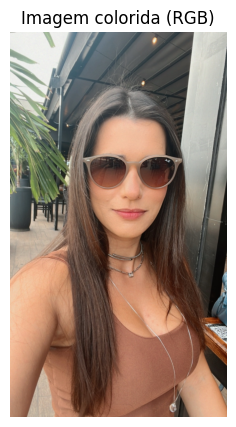

In [ ]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

img_rgb = Image.open(img_name).convert('RGB')
np_rgb = np.array(img_rgb)

plt.figure(figsize=(5,5))
plt.imshow(np_rgb)
plt.title('Imagem colorida (RGB)')
plt.axis('off')

(np.float64(-0.5), np.float64(863.5), np.float64(1535.5), np.float64(-0.5))

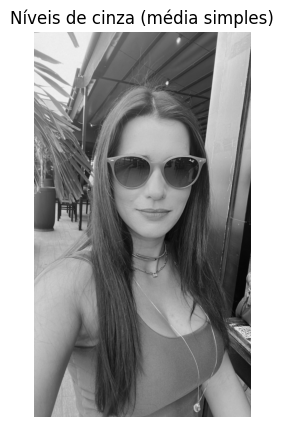

In [ ]:
gray_mean = np.mean(np_rgb, axis=2).astype(np.uint8)

plt.figure(figsize=(5,5))
plt.imshow(gray_mean, cmap='gray', vmin=0, vmax=255)
plt.title('Níveis de cinza (média simples)')
plt.axis('off')

Limiar Otsu (NumPy): 124


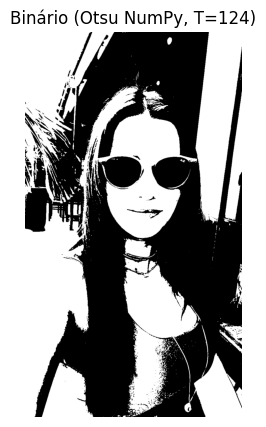

In [ ]:
def otsu_numpy(gray_u8):
    g = gray_u8.astype(np.uint8, copy=False)
    hist = np.bincount(g.ravel(), minlength=256).astype(np.float64)
    P = hist / hist.sum()
    omega = np.cumsum(P)
    mu = np.cumsum(P * np.arange(256))
    mu_t = mu[-1]

    sigma_b2 = (mu_t*omega - mu)**2 / (omega*(1.0 - omega) + 1e-12)
    T = int(np.nanargmax(sigma_b2))
    out = np.where(g >= T, 255, 0).astype(np.uint8)
    return T, out

T_otsu, binary_otsu_np = otsu_numpy(gray)
print('Limiar Otsu (NumPy):', T_otsu)

plt.figure(figsize=(5,5)); plt.imshow(binary_otsu_np, cmap='gray', vmin=0, vmax=255)
plt.axis('off'); plt.title(f'Binário (Otsu NumPy, T={T_otsu})');